In [201]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [202]:
data = pd.read_csv("15_1.csv",encoding='euc-kr')

data= data.drop("gid", axis =1)
data.head()

,busstop,market,parking,all_pop,road,cctv,senior,center,hos_pharma,pharmacy,...,accidnet_r,old_accide,walking_ac,bank,religion,hospital,subway_ent,church,old_pop,gongwon
0,0,0,0,315,720.306,3,0,0,0,0,...,0.00000,0,0,0,0,0,0,0,47,0
1,0,0,0,1182,0.000,0,1,0,0,0,...,0.00000,0,0,0,0,0,0,0,171,0
2,0,0,0,1393,0.000,0,0,0,0,0,...,0.00000,0,0,0,0,0,0,0,183,0
3,0,0,0,229,693.173,4,0,0,0,0,...,0.00846,0,1,0,0,0,0,0,57,0
4,0,0,0,531,781.665,4,0,0,1,1,...,0.00000,0,0,0,1,0,0,1,115,0


In [203]:
col1 = data.shape[0]
col2 = data.shape[1]

print(col1,col2)                      #1539,25

data.info()

1539 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   busstop     1539 non-null   int64  
 1   market      1539 non-null   int64  
 2   parking     1539 non-null   int64  
 3   all_pop     1539 non-null   int64  
 4   road        1539 non-null   float64
 5   cctv        1539 non-null   int64  
 6   senior      1539 non-null   int64  
 7   center      1539 non-null   int64  
 8   hos_pharma  1539 non-null   int64  
 9   pharmacy    1539 non-null   int64  
 10  shower      1539 non-null   int64  
 11  food        1539 non-null   int64  
 12  pro_cctv    1539 non-null   int64  
 13  hall        1539 non-null   int64  
 14  accidnet_r  1539 non-null   float64
 15  old_accide  1539 non-null   int64  
 16  walking_ac  1539 non-null   int64  
 17  bank        1539 non-null   int64  
 18  religion    1539 non-null   int64  
 19  hospital    1539 no

C:\Users\user\AppData\Local\Temp\ipykernel_14164\2830597871.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


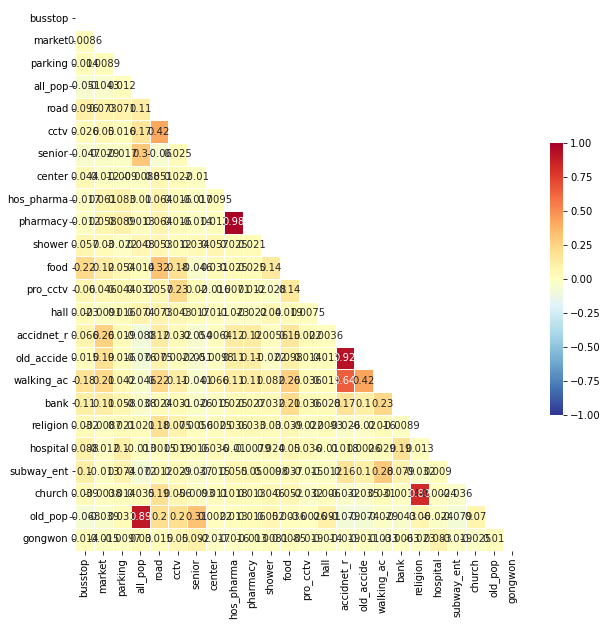

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
df = data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [205]:
feature_columns = data.columns.difference(["accidnet_r"]) # Target column 빼기

X = data[feature_columns]
y = data.accidnet_r

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)



(1077, 23) (462, 23) (1077,) (462,)


In [206]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   busstop     1539 non-null   int64  
 1   market      1539 non-null   int64  
 2   parking     1539 non-null   int64  
 3   all_pop     1539 non-null   int64  
 4   road        1539 non-null   float64
 5   cctv        1539 non-null   int64  
 6   senior      1539 non-null   int64  
 7   center      1539 non-null   int64  
 8   hos_pharma  1539 non-null   int64  
 9   pharmacy    1539 non-null   int64  
 10  shower      1539 non-null   int64  
 11  food        1539 non-null   int64  
 12  pro_cctv    1539 non-null   int64  
 13  hall        1539 non-null   int64  
 14  accidnet_r  1539 non-null   float64
 15  old_accide  1539 non-null   int64  
 16  walking_ac  1539 non-null   int64  
 17  bank        1539 non-null   int64  
 18  religion    1539 non-null   int64  
 19  hospital    1539 non-null  

In [208]:
data.isnull().sum()

busstop       0
market        0
parking       0
all_pop       0
road          0
cctv          0
senior        0
center        0
hos_pharma    0
pharmacy      0
shower        0
food          0
pro_cctv      0
hall          0
accidnet_r    0
old_accide    0
walking_ac    0
bank          0
religion      0
hospital      0
subway_ent    0
church        0
old_pop       0
gongwon       0
dtype: int64

In [239]:
data = sm.add_constant(data, has_constant = "add")
data

,const,const,busstop,market,parking,all_pop,road,cctv,senior,center,...,accidnet_r,old_accide,walking_ac,bank,religion,hospital,subway_ent,church,old_pop,gongwon
0,1.0,1.0,0,0,0,315,720.306,3,0,0,...,0.00000,0,0,0,0,0,0,0,47,0
1,1.0,1.0,0,0,0,1182,0.000,0,1,0,...,0.00000,0,0,0,0,0,0,0,171,0
2,1.0,1.0,0,0,0,1393,0.000,0,0,0,...,0.00000,0,0,0,0,0,0,0,183,0
3,1.0,1.0,0,0,0,229,693.173,4,0,0,...,0.00846,0,1,0,0,0,0,0,57,0
4,1.0,1.0,0,0,0,531,781.665,4,0,0,...,0.00000,0,0,0,1,0,0,1,115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,1.0,1.0,0,0,0,0,270.708,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0
1535,1.0,1.0,0,0,0,0,202.308,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0
1536,1.0,1.0,0,0,0,0,0.000,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0
1537,1.0,1.0,0,0,0,0,0.000,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0


In [240]:
model = sm.OLS(train_y,train_x)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             accidnet_r   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              674.8
Date:                Sat, 13 Aug 2022   Prob (F-statistic):                        0.00
Time:                        17:32:14   Log-Likelihood:                          3419.3
No. Observations:                1077   AIC:                                     -6793.
Df Residuals:                    1054   BIC:                                     -6678.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
all_pop     -5.07e-06   2.86e-06     -1.773      0.077   -1.07e-05    5.41e-07
bank           0.0035      0.001      3.027      0.003       0.001       0.006
busstop        0.0003      0.001      0.527      0.598      -0.001       0.001
cctv           0.0001      0.000      0.754      0.451      -0.000       0.000
center        -0.0010      0.001     -0.955      0.340      -0.003       0.001
church        -0.0002      0.001     -0.168      0.867      -0.002       0.002
food       -6.164e-05   6.56e-05     -0.939      0.348      -0.000    6.72e-05
gongwon        0.0005      0.002      0.296      0.767      -0.003       0.004
hall          -0.0061      0.003     -2.178      0.030      -0.012      -0.001
hos_pharma    -0.0022      0.002     -1.030      0.303      -0.006       0.002
hospital      -0.0012      0.002     -0.501      0.617      -0.006       0.004
market         0.0176      0.003      6.617      0.000       0.012       0.023
old_accide     0.1633      0.002     89.977      0.000       0.160       0.167
old_pop     1.383e-05   1.37e-05      1.012      0.312    -1.3e-05    4.06e-05
parking       -0.0019      0.002     -1.093      0.274      -0.005       0.001
pharmacy       0.0023      0.002      1.030      0.303      -0.002       0.007
pro_cctv      -0.0019      0.001     -1.314      0.189      -0.005       0.001
religion      -0.0004      0.001     -0.522      0.602      -0.002       0.001
road       -1.397e-06   9.39e-07     -1.487      0.137   -3.24e-06    4.47e-07
senior     -4.468e-05      0.001     -0.039      0.969      -0.002       0.002
shower         0.0001      0.003      0.052      0.959      -0.005       0.005
subway_ent    -0.0034      0.002     -1.960      0.050      -0.007    3.21e-06
walking_ac     0.0111      0.000     28.684      0.000       0.010       0.012
==============================================================================
Omnibus:                      348.978   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43789.316
Skew:                           0.330   Prob(JB):                         0.00
Kurtosis:                      34.231   Cond. No.                     6.20e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [241]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,0.000000,const
2,1.100472,busstop
3,1.110078,market
4,1.037178,parking
5,5.164022,all_pop
6,1.483460,road
7,1.320437,cctv
8,1.144337,senior
9,1.017192,center


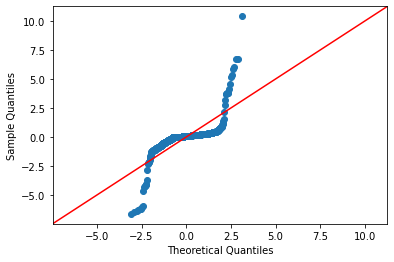

In [242]:
res = fitted_model.resid

fig = sm.qqplot(res,fit = True,line = '45')

In [243]:
train_x

,all_pop,bank,busstop,cctv,center,church,food,gongwon,hall,hos_pharma,...,old_pop,parking,pharmacy,pro_cctv,religion,road,senior,shower,subway_ent,walking_ac
312,330,0,0,3,0,0,2,0,0,0,...,92,0,0,0,0,905.828,0,0,0,0
667,92,0,2,5,0,0,7,1,0,0,...,27,0,0,0,0,658.604,0,0,0,0
1070,204,0,0,7,0,0,11,0,0,0,...,45,0,0,0,0,1156.722,0,0,0,0
1517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0,0,0,0
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,385.830,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0,0,0,0
674,325,0,0,4,0,0,12,0,0,0,...,74,0,0,0,0,556.649,0,0,0,0
258,217,1,1,5,0,0,4,0,0,0,...,7,0,0,1,0,536.014,0,0,0,1
1334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0,0,0,0


In [244]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Residual')

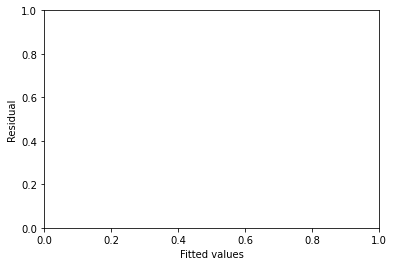

In [245]:
pred_y = fitted_model.predict(train_x)

plt.xlim()
plt.xlabel('Fitted values')
plt.ylabel('Residual')

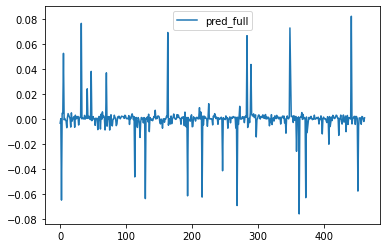

In [246]:
pred_y2 = fitted_model.predict(test_x)

# 예측데이터 잔차

plt.plot(np.array(test_y - pred_y2), label = "pred_full")
plt.legend()
plt.show()

In [256]:
from sklearn.metrics import mean_squared_error


In [257]:

mean_squared_error(test_y,pred_y2)

0.00017291920534032767

In [258]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020D4F389610>, 'AIC': -3920.6564279829545}


In [259]:
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel
 
#print(getBest(x=trainX,y=trainY,k=2))

ValueError: The 'sort' keyword only takes the values of None or False; 2 was passed.